In [1]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
pip install statsmodels

In [3]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [4]:
cd drive

/content/drive


In [5]:
cd MyDrive

/content/drive/MyDrive


In [6]:
cd XBBvariants

/content/drive/MyDrive/XBBvariants


In [7]:
import os

In [8]:
cwd = os.getcwd() + os.sep
cwd

'/content/drive/MyDrive/XBBvariants/'

In [9]:
datapath = cwd+"Data"+os.sep
datapath

'/content/drive/MyDrive/XBBvariants/Data/'

In [10]:
import numpy as np

In [11]:
spike_muts_variants = {
                        "XBB.1": np.array([19, 24, 83, 142, 146, 183, 213, 252, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                              460, 477, 478, 484, 490, 498, 501, 505, 614, 655, 679, 681, 764, 796, 954, 969]),
                        "XBB.1.9.1": np.array([19, 24, 83, 142, 146, 183, 213, 252, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                              460, 477, 478, 484, 486, 490, 498, 501, 505, 614, 655, 679, 681, 764, 796, 954, 969]),
                       "XBB.2.3": np.array([19, 24, 83, 142, 146, 183, 213, 253, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                              460, 477, 478, 484, 486, 490, 498, 501, 505, 521, 614, 655, 679, 681, 764, 796, 954, 969]),
                       "XBB.1.5": np.array([19, 24, 83, 142, 146, 183, 213, 252, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                              460, 477, 478, 484, 486, 490, 498, 501, 505, 614, 655, 679, 681, 764, 796, 954, 969]),
                       "XBB.1.16": np.array([19, 24, 83, 142, 146, 180, 183, 213, 252, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                              460, 477, 478, 484, 486, 490, 498, 501, 505, 614, 655, 679, 681, 764, 796, 954, 969]),
                       "EG.5.1": np.array([19, 24, 52, 83, 142, 146, 180, 183, 213, 252, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                            456, 460, 477, 478, 484, 486, 490, 498, 501, 505, 614, 655, 679, 681, 764, 796, 954, 969])
                      }

In [12]:
conformations = ["closed", "open", "complex"]
variants = list(spike_muts_variants.keys())

In [13]:
import pandas as pd

In [14]:
tm_scores = {}
for conformation in conformations:
  tm_score = pd.read_csv(datapath+"tm_score_variants_{}.csv".format(conformation), index_col = 0)
  tm_scores[conformation] = tm_score

In [15]:
tm_scores["closed"]

,XBB.1,XBB.1.9.1,XBB.2.3,XBB.1.5,XBB.1.16,EG.5.1
XBB.1,100.000000,99.999998,99.999996,99.999998,99.999998,99.999997
XBB.1.9.1,99.999998,100.000000,99.999998,100.000000,100.000000,99.999999
XBB.2.3,99.999996,99.999998,100.000000,99.999998,99.999998,99.999997
XBB.1.5,99.999998,100.000000,99.999998,100.000000,100.000000,99.999999
XBB.1.16,99.999998,100.000000,99.999998,100.000000,100.000000,99.999999
EG.5.1,99.999997,99.999999,99.999997,99.999999,99.999999,100.000000


In [16]:
structure_distances = {}
for conformation in conformations:
  structure_distances[conformation] = {}
  for variant1 in variants:
    for i, variant2 in enumerate(variants):
      if "{} vs {}".format(variant1, variant2) not in (structure_distances[conformation].keys()) and "{} vs {}".format(variant2, variant1) not in (structure_distances[conformation].keys()):
        structure_distances[conformation]["{} vs {}".format(variant1, variant2)] = 100 - tm_scores[conformation][variant1][i]

In [17]:
structure_distances["closed"]

{'XBB.1 vs XBB.1': 0.0,
 'XBB.1 vs XBB.1.9.1': 1.919605182365558e-06,
 'XBB.1 vs XBB.2.3': 4.063826636979684e-06,
 'XBB.1 vs XBB.1.5': 1.919605182365558e-06,
 'XBB.1 vs XBB.1.16': 2.1570658219616234e-06,
 'XBB.1 vs EG.5.1': 3.102077059224939e-06,
 'XBB.1.9.1 vs XBB.1.9.1': 0.0,
 'XBB.1.9.1 vs XBB.2.3': 2.140878379464084e-06,
 'XBB.1.9.1 vs XBB.1.5': 0.0,
 'XBB.1.9.1 vs XBB.1.16': 2.3783060498772102e-07,
 'XBB.1.9.1 vs EG.5.1': 1.1840678979524455e-06,
 'XBB.2.3 vs XBB.2.3': 0.0,
 'XBB.2.3 vs XBB.1.5': 2.140878379464084e-06,
 'XBB.2.3 vs XBB.1.16': 2.3786754752563866e-06,
 'XBB.2.3 vs EG.5.1': 3.323283806366817e-06,
 'XBB.1.5 vs XBB.1.5': 0.0,
 'XBB.1.5 vs XBB.1.16': 2.3783060498772102e-07,
 'XBB.1.5 vs EG.5.1': 1.1840678979524455e-06,
 'XBB.1.16 vs XBB.1.16': 0.0,
 'XBB.1.16 vs EG.5.1': 1.4226864379907056e-06,
 'EG.5.1 vs EG.5.1': 0.0}

In [18]:
df = pd.read_csv(cwd+"Fasta/distmat_xbb.csv", header = 0, index_col= 0)
df

,EG.5.1,XBB.2.3,XBB.1,XBB.1.9.1,XBB.1.5,XBB.1.16
EG.5.1,0,"0,32","0,16","0,16","0,16","0,24"
XBB.2.3,"0,32",0,"0,16","0,16","0,16","0,24"
XBB.1,"0,16","0,16",0,0,0,"0,08"
XBB.1.9.1,"0,16","0,16",0,0,0,"0,08"
XBB.1.5,"0,16","0,16",0,0,0,"0,08"
XBB.1.16,"0,24","0,24","0,08","0,08","0,08",0


In [19]:
variants = list(df.columns)
sequence_distances = {}
for variant1 in variants:
  for i, variant2 in enumerate(variants):
    if "{} vs {}".format(variant1, variant2) not in (sequence_distances.keys()) and "{} vs {}".format(variant2, variant1) not in (sequence_distances.keys()):
      sequence_distances["{} vs {}".format(variant1, variant2)] = float((df[variant1].values[i]).replace(",", "."))
sequence_distances

{'EG.5.1 vs EG.5.1': 0.0,
 'EG.5.1 vs XBB.2.3': 0.32,
 'EG.5.1 vs XBB.1': 0.16,
 'EG.5.1 vs XBB.1.9.1': 0.16,
 'EG.5.1 vs XBB.1.5': 0.16,
 'EG.5.1 vs XBB.1.16': 0.24,
 'XBB.2.3 vs XBB.2.3': 0.0,
 'XBB.2.3 vs XBB.1': 0.16,
 'XBB.2.3 vs XBB.1.9.1': 0.16,
 'XBB.2.3 vs XBB.1.5': 0.16,
 'XBB.2.3 vs XBB.1.16': 0.24,
 'XBB.1 vs XBB.1': 0.0,
 'XBB.1 vs XBB.1.9.1': 0.0,
 'XBB.1 vs XBB.1.5': 0.0,
 'XBB.1 vs XBB.1.16': 0.08,
 'XBB.1.9.1 vs XBB.1.9.1': 0.0,
 'XBB.1.9.1 vs XBB.1.5': 0.0,
 'XBB.1.9.1 vs XBB.1.16': 0.08,
 'XBB.1.5 vs XBB.1.5': 0.0,
 'XBB.1.5 vs XBB.1.16': 0.08,
 'XBB.1.16 vs XBB.1.16': 0.0}

In [20]:
from plotly import graph_objects as go

In [21]:
colors = """aliceblue, antiquewhite, aqua, aquamarine, azure,
                beige, bisque, black, blanchedalmond, blue,
                blueviolet, brown, burlywood, cadetblue,
                chartreuse, chocolate, coral, cornflowerblue,
                cornsilk, crimson, cyan, darkblue, darkcyan,
                darkgoldenrod, darkgray, darkgrey, darkgreen,
                darkkhaki, darkmagenta, darkolivegreen, darkorange,
                darkorchid, darkred, darksalmon, darkseagreen,
                darkslateblue, darkslategray, darkslategrey,
                darkturquoise, darkviolet, deeppink, deepskyblue,
                dimgray, dimgrey, dodgerblue, firebrick,
                floralwhite, forestgreen, fuchsia, gainsboro,
                ghostwhite, gold, goldenrod, gray, grey, green,
                greenyellow, honeydew, hotpink, indianred, indigo,
                ivory, khaki, lavender, lavenderblush, lawngreen,
                lemonchiffon, lightblue, lightcoral, lightcyan,
                lightgoldenrodyellow, lightgray, lightgrey,
                lightgreen, lightpink, lightsalmon, lightseagreen,
                lightskyblue, lightslategray, lightslategrey,
                lightsteelblue, lightyellow, lime, limegreen,
                linen, magenta, maroon, mediumaquamarine,
                mediumblue, mediumorchid, mediumpurple,
                mediumseagreen, mediumslateblue, mediumspringgreen,
                mediumturquoise, mediumvioletred, midnightblue,
                mintcream, mistyrose, moccasin, navajowhite, navy,
                oldlace, olive, olivedrab, orange, orangered,
                orchid, palegoldenrod, palegreen, paleturquoise,
                palevioletred, papayawhip, peachpuff, peru, pink,
                plum, powderblue, purple, red, rosybrown,
                royalblue, saddlebrown, salmon, sandybrown,
                seagreen, seashell, sienna, silver, skyblue,
                slateblue, slategray, slategrey, snow, springgreen,
                steelblue, tan, teal, thistle, tomato, turquoise,
                violet, wheat, white, whitesmoke, yellow,
                yellowgreen"""

In [22]:
all_colors = [color.replace(" ", "").replace("\n", "") for color in colors.split(",")]
all_colors

['aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgrey',
 'darkgreen',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'grey',
 'green',
 'greenyellow',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 

In [23]:
from random import sample

labels = list(structure_distances[conformation].keys())
N = len(labels)
colors = sample(all_colors, k = N)
colors

['lightslategrey',
 'olive',
 'ivory',
 'powderblue',
 'gainsboro',
 'lightyellow',
 'whitesmoke',
 'seagreen',
 'orangered',
 'lavenderblush',
 'mediumspringgreen',
 'purple',
 'red',
 'papayawhip',
 'violet',
 'chocolate',
 'salmon',
 'aquamarine',
 'pink',
 'maroon',
 'burlywood']

In [24]:
for conformation in conformations:
  labels = list(structure_distances[conformation].keys())
  fig = go.Figure()

  for i, label in enumerate(labels):
    print(label)
    color = colors[i]
    str_distance = [structure_distances[conformation][label]]
    variant1, variant2 = label.split(" vs ")
    if label not in sequence_distances.keys():
      label = "{} vs {}".format(variant2, variant1)
    seq_distance = [sequence_distances[label]]
    if variant1 == variant2:
      continue
    fig.add_trace(go.Scatter(x = seq_distance, y=str_distance, mode='markers', name = "<b>"+label+"</b>", marker_color = color))#markers+text

  fig.update_layout(template = "simple_white", xaxis_showgrid = True, yaxis_showgrid = True, showlegend = True, xaxis_title = "<b> Sequence Distance </b>", yaxis_title = "<b> Structure Distance </b>", title = "<b> Structure distances in {} conformation vs Sequence distances between SARS-CoV-2 XBB variants </b>".format(conformation))
  #fig.write_image(cwd+"/Figures/seq_vs_structure_{}_distances.png".format(conformation))
  break

fig.show()

XBB.1 vs XBB.1
XBB.1 vs XBB.1.9.1
XBB.1 vs XBB.2.3
XBB.1 vs XBB.1.5
XBB.1 vs XBB.1.16
XBB.1 vs EG.5.1
XBB.1.9.1 vs XBB.1.9.1
XBB.1.9.1 vs XBB.2.3
XBB.1.9.1 vs XBB.1.5
XBB.1.9.1 vs XBB.1.16
XBB.1.9.1 vs EG.5.1
XBB.2.3 vs XBB.2.3
XBB.2.3 vs XBB.1.5
XBB.2.3 vs XBB.1.16
XBB.2.3 vs EG.5.1
XBB.1.5 vs XBB.1.5
XBB.1.5 vs XBB.1.16
XBB.1.5 vs EG.5.1
XBB.1.16 vs XBB.1.16
XBB.1.16 vs EG.5.1
EG.5.1 vs EG.5.1


In [25]:
new = {}
for conformation in conformations:
  labels = list(structure_distances[conformation].keys())
  new[conformation] = {}
  for variant1 in variants:
    for variant2 in variants:
      label = "{} vs {}".format(variant1, variant2)
      if label not in labels:
        label = "{} vs {}".format(variant2, variant1)
      #print(label)
      if variant1 == variant2:
        continue
      str_distance = structure_distances[conformation][label]

      label = "{} vs {}".format(variant1, variant2)
      if label not in sequence_distances.keys():
        label = "{} vs {}".format(variant2, variant1)
      seq_distance = sequence_distances[label]
      if "[{}, {}]".format(round(str_distance, 6), seq_distance) not in new[conformation].keys():
        new[conformation]["[{}, {}]".format(round(str_distance, 6), seq_distance)] = label
      else:
        #print("else")
        if variant1 not in new[conformation]["[{}, {}]".format(round(str_distance, 6), seq_distance)]:
          #print(variant1)
          new[conformation]["[{}, {}]".format(round(str_distance, 6), seq_distance)] = new[conformation]["[{}, {}]".format(round(str_distance, 6), seq_distance)] + " vs " + variant1
        elif variant2 not in new[conformation]["[{}, {}]".format(round(str_distance, 6), seq_distance)]:
          #print(variant2)
          new[conformation]["[{}, {}]".format(round(str_distance, 6), seq_distance)] = new[conformation]["[{}, {}]".format(round(str_distance, 6), seq_distance)] + " vs " + variant2
new

{'closed': {'[3e-06, 0.32]': 'EG.5.1 vs XBB.2.3',
  '[3e-06, 0.16]': 'EG.5.1 vs XBB.1',
  '[1e-06, 0.16]': 'EG.5.1 vs XBB.1.9.1 vs XBB.1.5',
  '[1e-06, 0.24]': 'EG.5.1 vs XBB.1.16',
  '[4e-06, 0.16]': 'XBB.2.3 vs XBB.1',
  '[2e-06, 0.16]': 'XBB.2.3 vs XBB.1.9.1 vs XBB.1.5',
  '[2e-06, 0.24]': 'XBB.2.3 vs XBB.1.16',
  '[2e-06, 0.0]': 'XBB.1 vs XBB.1.9.1 vs XBB.1.5',
  '[2e-06, 0.08]': 'XBB.1 vs XBB.1.16',
  '[0.0, 0.0]': 'XBB.1.9.1 vs XBB.1.5',
  '[0.0, 0.08]': 'XBB.1.9.1 vs XBB.1.16 vs XBB.1.5'},
 'open': {'[4e-06, 0.32]': 'EG.5.1 vs XBB.2.3',
  '[3e-06, 0.16]': 'EG.5.1 vs XBB.1',
  '[1e-06, 0.16]': 'EG.5.1 vs XBB.1.9.1 vs XBB.1.5',
  '[2e-06, 0.24]': 'EG.5.1 vs XBB.1.16',
  '[4e-06, 0.16]': 'XBB.2.3 vs XBB.1',
  '[2e-06, 0.16]': 'XBB.2.3 vs XBB.1.9.1 vs XBB.1.5',
  '[3e-06, 0.24]': 'XBB.2.3 vs XBB.1.16',
  '[2e-06, 0.0]': 'XBB.1 vs XBB.1.9.1 vs XBB.1.5',
  '[2e-06, 0.08]': 'XBB.1 vs XBB.1.16',
  '[0.0, 0.0]': 'XBB.1.9.1 vs XBB.1.5',
  '[0.0, 0.08]': 'XBB.1.9.1 vs XBB.1.16 vs XBB.1.5'}

In [26]:
labels = list(new[conformation].keys())
N = len(labels)
all_colors = [color for color in all_colors if "dark" in color]
colors = sample(all_colors, k = N)
colors

['darkslategrey',
 'darkorange',
 'darkmagenta',
 'darkseagreen',
 'darkgrey',
 'darkviolet',
 'darkred',
 'darkgray',
 'darkgreen',
 'darkkhaki']

In [ ]:
"""
for conformation in conformations:

  fig = go.Figure()

  for i, (distances, label) in enumerate(new[conformation].items()):

    color = colors[i]
    distances = distances.replace("[", "").replace("]", "").split(",")
    str_distance = float(distances[0])
    seq_distance = float(distances[1])
    print(str_distance, seq_distance, label)
    fig.add_trace(go.Scatter(x = [seq_distance], y=[str_distance], mode='markers+text', name = "<b>"+label+"</b>", text = "<b>"+label+"</b>", textfont_color = color, textfont_size = 16, marker_color = color, textposition="top center"))#markers+text

  fig.update_layout(template = "simple_white", xaxis_showgrid = True, yaxis_showgrid = True, showlegend = True, xaxis_title = "<b> Sequence Distance </b>", yaxis_title = "<b> Structure Distance </b>", title = "<b> Structure distances in {} conformation vs Sequence distances between SARS-CoV-2 XBB variants </b>".format(conformation), title_font_family="Arial Black", title_font_size = 32)
  fig.update_layout(xaxis_range = [-0.05, 0.35], width = 1200, height = 1200)
  fig.update_yaxes(title_font_family="Arial Black", title_font_size = 32, tickfont_family="Arial Black", tickfont_size = 32)
  fig.update_xaxes(title_font_family="Arial Black", title_font_size = 32, tickfont_family="Arial Black", tickfont_size = 32)
  #fig.write_image(cwd+"/Figures/seq_vs_structure_{}_distances.png".format(conformation), format="png", width=1600, height=800, scale=0)

fig.show()
"""

'\nfor conformation in conformations:\n\n  fig = go.Figure()\n\n  for i, (distances, label) in enumerate(new[conformation].items()):\n\n    color = colors[i]\n    distances = distances.replace("[", "").replace("]", "").split(",")\n    str_distance = float(distances[0])\n    seq_distance = float(distances[1])\n    print(str_distance, seq_distance, label)\n    fig.add_trace(go.Scatter(x = [seq_distance], y=[str_distance], mode=\'markers+text\', name = "<b>"+label+"</b>", text = "<b>"+label+"</b>", textfont_color = color, textfont_size = 16, marker_color = color, textposition="top center"))#markers+text\n\n  fig.update_layout(template = "simple_white", xaxis_showgrid = True, yaxis_showgrid = True, showlegend = True, xaxis_title = "<b> Sequence Distance </b>", yaxis_title = "<b> Structure Distance </b>", title = "<b> Structure distances in {} conformation vs Sequence distances between SARS-CoV-2 XBB variants </b>".format(conformation), title_font_family="Arial Black", title_font_size = 32)

In [27]:
sequence_distances

{'EG.5.1 vs EG.5.1': 0.0,
 'EG.5.1 vs XBB.2.3': 0.32,
 'EG.5.1 vs XBB.1': 0.16,
 'EG.5.1 vs XBB.1.9.1': 0.16,
 'EG.5.1 vs XBB.1.5': 0.16,
 'EG.5.1 vs XBB.1.16': 0.24,
 'XBB.2.3 vs XBB.2.3': 0.0,
 'XBB.2.3 vs XBB.1': 0.16,
 'XBB.2.3 vs XBB.1.9.1': 0.16,
 'XBB.2.3 vs XBB.1.5': 0.16,
 'XBB.2.3 vs XBB.1.16': 0.24,
 'XBB.1 vs XBB.1': 0.0,
 'XBB.1 vs XBB.1.9.1': 0.0,
 'XBB.1 vs XBB.1.5': 0.0,
 'XBB.1 vs XBB.1.16': 0.08,
 'XBB.1.9.1 vs XBB.1.9.1': 0.0,
 'XBB.1.9.1 vs XBB.1.5': 0.0,
 'XBB.1.9.1 vs XBB.1.16': 0.08,
 'XBB.1.5 vs XBB.1.5': 0.0,
 'XBB.1.5 vs XBB.1.16': 0.08,
 'XBB.1.16 vs XBB.1.16': 0.0}

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression

conformation = "closed"
str_dist = np.array(list(structure_distances[conformation].values())).reshape(-1, 1)
seq_dist = np.array(list(sequence_distances.values())).reshape(-1, 1)


reg = LinearRegression().fit(str_dist, seq_dist)
r_squared = reg.score(str_dist, seq_dist)

In [29]:
# Calculate Pearson's correlation coefficient
correlation_coefficient = np.corrcoef(str_dist.flatten(), seq_dist.flatten())[0, 1]

# Print the correlation coefficient
print(f"Pearson's Correlation Coefficient: {correlation_coefficient:.2f}")

Pearson's Correlation Coefficient: 0.46


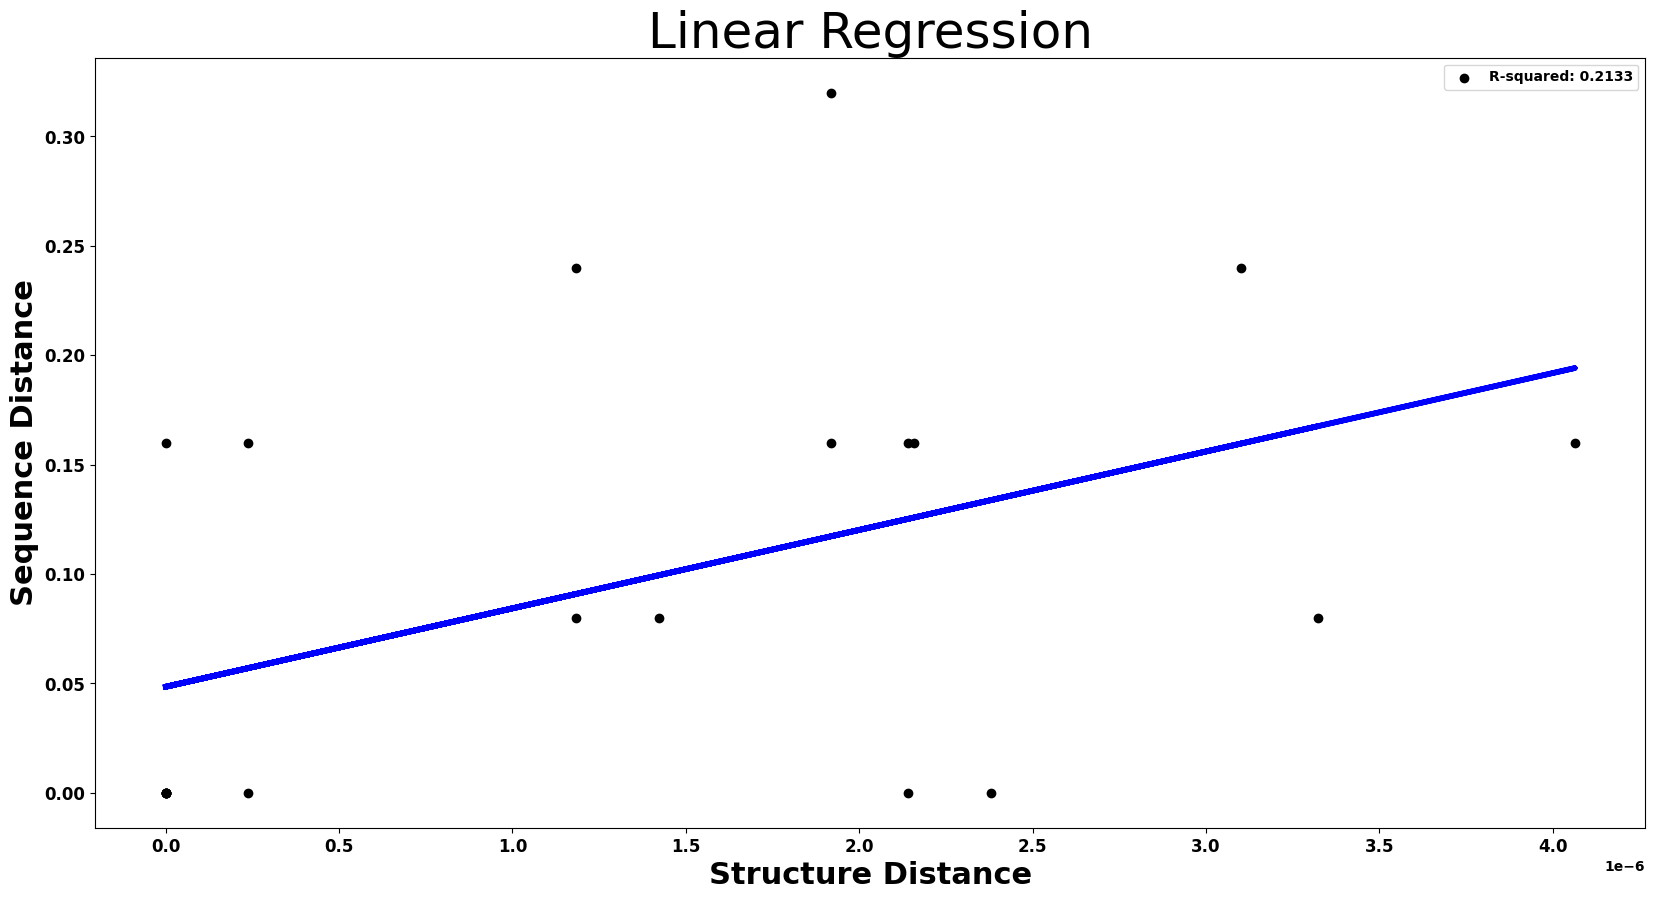

In [30]:
import matplotlib.pyplot as plt

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

m = reg.coef_
q = reg.intercept_
seq_dist_pred = reg.predict(str_dist)

# Plot outputs
fig = plt.figure(figsize = (20, 10))
plt.title("Linear Regression", size = 36)
plt.scatter(str_dist, seq_dist, color="black", label=f'R-squared: {r_squared:.4f}')
plt.plot(str_dist, seq_dist_pred, color="blue", linewidth=4)
plt.xlabel("Structure Distance", size = 22)
plt.ylabel("Sequence Distance", size = 22)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.legend()
fig.savefig("linearRegression.png")

In [52]:
import statsmodels.api as sm

# Add a constant term to the independent variable matrix for the intercept term
X_with_intercept = sm.add_constant(seq_dist)

# Fit the linear regression model
model = sm.OLS(str_dist, X_with_intercept)
results = model.fit()

# Print the summary which includes p-values among other statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     5.152
Date:                Fri, 29 Dec 2023   Prob (F-statistic):             0.0350
Time:                        17:32:43   Log-Likelihood:                 258.04
No. Observations:                  21   AIC:                            -512.1
Df Residuals:                      19   BIC:                            -510.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.386e-07   3.57e-07      2.066      0.0

In [51]:
# Access p-values directly
print("P-values:")
print(results.pvalues)

P-values:
[0.05270937 0.0350449 ]


In [54]:
# Access the coefficients
coefficients = results.params
coefficients

array([7.38601321e-07, 5.95087581e-06])

In [ ]:
variants = ['XBB.1', 'XBB.1.9.1', 'XBB.2.3', 'XBB.1.5', 'XBB.1.16', 'EG.5.1']

In [ ]:
xbb1 = """MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSV
              LHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPALPFNDGVYFASTEKSNIIRGWI
              FGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLDVYQKNNKSWMESEFRVYSSAN
              NCTFEYVSQPFLMDLEGKEGNFKNLREFVFKNIDGYFKIYSKHTPINLERDLPQGFSA
              LEPLVDLPIGINITRFQTLLALHRSYLTPVDSSSGWTAGAAAYYVGYLQPRTFLLKYN
              ENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPF
                     HEVFNATTFASVYAWNRKRISNCVADYSVIYNFAPFFAFKCYGVSPTKLNDLCFTNVY
                     ADSFVIRGNEVSQIAPGQTGNIADYNYKLPDDFTGCVIAWNSNKLDSKPSGNYNYLYR
                     LFRKSKLKPFERDISTEIYQAGNKPCNGVAGSNCYSPLQSYGFRPTYGVGHQPYRVVV
                     LSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIA
                     DTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQGVNCTEVPVAIHADQ
                     LTPTWRVYSTGSNVFQTRAGCLIGAEYVNNSYECDIPIGAGICASYQTQTKSHRRARS
                     VASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICG
                     DSTECSNLLLQYGSFCTQLKRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKYFGGFNF
                     SQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTV
                     LPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYE
                     NQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNHNAQALNTLVKQLSSKFGAISSV
                     LNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVL
                     GQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPRE
                     GVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKE
                     ELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQ
                     YIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLK
                     GVKLHYT"""

wt = """
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR
                     SSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIR
                     GWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVY
                     SSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQ
                     GFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFL
                     LKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITN
                     LCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCF
                     TNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYN
                     YLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPY
                     RVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFG
                     RDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAI
                     HADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPR
                     RARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTM
                     YICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFG
                     GFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFN
                     GLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQN
                     VLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGA
                     ISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMS
                     ECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAH
                     FPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELD
                     SFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELG
                     KYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSE
                     PVLKGVKLHYT"""

In [ ]:
xbb1 = xbb1.replace("\n", "").replace(" ", "")
wt = wt.replace("\n", "").replace(" ", "")
xbb1

'MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPALPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLDVYQKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKEGNFKNLREFVFKNIDGYFKIYSKHTPINLERDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPVDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFHEVFNATTFASVYAWNRKRISNCVADYSVIYNFAPFFAFKCYGVSPTKLNDLCFTNVYADSFVIRGNEVSQIAPGQTGNIADYNYKLPDDFTGCVIAWNSNKLDSKPSGNYNYLYRLFRKSKLKPFERDISTEIYQAGNKPCNGVAGSNCYSPLQSYGFRPTYGVGHQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQGVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEYVNNSYECDIPIGAGICASYQTQTKSHRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLKRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKYFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNHNAQALNTLVKQLSSKFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQS

In [ ]:
xbb1_list = [c for c in xbb1]
wt_list = [c for c in wt]
xbb1_list

['M',
 'F',
 'V',
 'F',
 'L',
 'V',
 'L',
 'L',
 'P',
 'L',
 'V',
 'S',
 'S',
 'Q',
 'C',
 'V',
 'N',
 'L',
 'I',
 'T',
 'R',
 'T',
 'Q',
 'S',
 'Y',
 'T',
 'N',
 'S',
 'F',
 'T',
 'R',
 'G',
 'V',
 'Y',
 'Y',
 'P',
 'D',
 'K',
 'V',
 'F',
 'R',
 'S',
 'S',
 'V',
 'L',
 'H',
 'S',
 'T',
 'Q',
 'D',
 'L',
 'F',
 'L',
 'P',
 'F',
 'F',
 'S',
 'N',
 'V',
 'T',
 'W',
 'F',
 'H',
 'A',
 'I',
 'H',
 'V',
 'S',
 'G',
 'T',
 'N',
 'G',
 'T',
 'K',
 'R',
 'F',
 'D',
 'N',
 'P',
 'A',
 'L',
 'P',
 'F',
 'N',
 'D',
 'G',
 'V',
 'Y',
 'F',
 'A',
 'S',
 'T',
 'E',
 'K',
 'S',
 'N',
 'I',
 'I',
 'R',
 'G',
 'W',
 'I',
 'F',
 'G',
 'T',
 'T',
 'L',
 'D',
 'S',
 'K',
 'T',
 'Q',
 'S',
 'L',
 'L',
 'I',
 'V',
 'N',
 'N',
 'A',
 'T',
 'N',
 'V',
 'V',
 'I',
 'K',
 'V',
 'C',
 'E',
 'F',
 'Q',
 'F',
 'C',
 'N',
 'D',
 'P',
 'F',
 'L',
 'D',
 'V',
 'Y',
 'Q',
 'K',
 'N',
 'N',
 'K',
 'S',
 'W',
 'M',
 'E',
 'S',
 'E',
 'F',
 'R',
 'V',
 'Y',
 'S',
 'S',
 'A',
 'N',
 'N',
 'C',
 'T',
 'F',
 'E',
 'Y',
 'V'

In [ ]:
import numpy as np
spike_muts_variants = {
                        "XBB.1": np.array([19, 24, 83, 142, 146, 183, 213, 252, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                              460, 477, 478, 484, 490, 498, 501, 505, 614, 655, 679, 681, 764, 796, 954, 969]),
                        "XBB.1.9.1": np.array([19, 24, 83, 142, 146, 183, 213, 252, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                              460, 477, 478, 484, 486, 490, 498, 501, 505, 614, 655, 679, 681, 764, 796, 954, 969]),
                       "XBB.2.3": np.array([19, 24, 83, 142, 146, 183, 213, 253, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                              460, 477, 478, 484, 486, 490, 498, 501, 505, 521, 614, 655, 679, 681, 764, 796, 954, 969]),
                       "XBB.1.5": np.array([19, 24, 83, 142, 146, 183, 213, 252, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                              460, 477, 478, 484, 486, 490, 498, 501, 505, 614, 655, 679, 681, 764, 796, 954, 969]),
                       "XBB.1.16": np.array([19, 24, 83, 142, 146, 180, 183, 213, 252, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                              460, 477, 478, 484, 486, 490, 498, 501, 505, 614, 655, 679, 681, 764, 796, 954, 969]),
                       "EG.5.1": np.array([19, 24, 52, 83, 142, 146, 180, 183, 213, 252, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                            456, 460, 477, 478, 484, 486, 490, 498, 501, 505, 614, 655, 679, 681, 764, 796, 954, 969])
                      }
mutations = spike_muts_variants["XBB.1"]

In [ ]:
def create_sequence_variant(wt_sequence, mutations, deletions):

  variant_sequence = wt_sequence.copy()
  for idx in deletions:
    print("Deletion: {}{}".format(variant_sequence[idx], idx))
    del variant_sequence[idx-1]

  for mutation in mutations:
    aa_wt = mutation[0]
    idx = int(mutation[1:-1])-1
    aa = mutation[-1]
    variant_sequence[idx] = aa

  return variant_sequence


In [ ]:
mutations = [
"T19I",
"L24S",
"V83A",
"G142D",
"H146Q",
"Q183E",
"V213E",
"G339H",
"R346T",
"L368I",
"S371F",
"S373P",
"S375F",
"T376A",
"D405N",
"R408S",
"K417N",
"N440K",
"V445P",
"G446S",
"N460K",
"S477N",
"T478K",
"E484A",
"F486P",
"F490S",
"Q498R",
"N501Y",
"Y505H",
"D614G",
"H655Y",
"N679K",
"P681H",
"N764K",
"D796Y",
"Q954H",
"N969K"
]

In [ ]:
deletions = [25, 26, 27, 144]

In [ ]:
xbb1_list = create_sequence_variant(wt_list, mutations, deletions)
xbb1_list

Deletion: P25
Deletion: Y26
Deletion: N27
Deletion: N144


['M',
 'F',
 'V',
 'F',
 'L',
 'V',
 'L',
 'L',
 'P',
 'L',
 'V',
 'S',
 'S',
 'Q',
 'C',
 'V',
 'N',
 'L',
 'I',
 'T',
 'R',
 'T',
 'Q',
 'S',
 'P',
 'Y',
 'N',
 'S',
 'F',
 'T',
 'R',
 'G',
 'V',
 'Y',
 'Y',
 'P',
 'D',
 'K',
 'V',
 'F',
 'R',
 'S',
 'S',
 'V',
 'L',
 'H',
 'S',
 'T',
 'Q',
 'D',
 'L',
 'F',
 'L',
 'P',
 'F',
 'F',
 'S',
 'N',
 'V',
 'T',
 'W',
 'F',
 'H',
 'A',
 'I',
 'H',
 'V',
 'S',
 'G',
 'T',
 'N',
 'G',
 'T',
 'K',
 'R',
 'F',
 'D',
 'N',
 'P',
 'V',
 'L',
 'P',
 'A',
 'N',
 'D',
 'G',
 'V',
 'Y',
 'F',
 'A',
 'S',
 'T',
 'E',
 'K',
 'S',
 'N',
 'I',
 'I',
 'R',
 'G',
 'W',
 'I',
 'F',
 'G',
 'T',
 'T',
 'L',
 'D',
 'S',
 'K',
 'T',
 'Q',
 'S',
 'L',
 'L',
 'I',
 'V',
 'N',
 'N',
 'A',
 'T',
 'N',
 'V',
 'V',
 'I',
 'K',
 'V',
 'C',
 'E',
 'F',
 'Q',
 'F',
 'C',
 'N',
 'D',
 'P',
 'F',
 'L',
 'G',
 'V',
 'Y',
 'D',
 'H',
 'N',
 'N',
 'Q',
 'S',
 'W',
 'M',
 'E',
 'S',
 'E',
 'F',
 'R',
 'V',
 'Y',
 'S',
 'S',
 'A',
 'N',
 'N',
 'C',
 'T',
 'F',
 'E',
 'Y',
 'V'

In [ ]:
fastas = {}
variants = {
    "XBB.1": ["T19I", "L24S", "V83A", "G142D", "H146Q", "Q183E", "V213E", "G339H","R346T", "L368I", "S371F", "S373P", "S375F", "T376A", "D405N", "R408S",  "K417N", "N440K","V445P", "G446S", "N460K", "S477N", "T478K", "E484A", "F486P", "F490S", "Q498R", "N501Y", "Y505H", "D614G", "H655Y", "N679K", "P681H", "N764K", "D796Y", "Q954H", "N969K"],
    "XBB.1.9.1": ["F486P","T19I", "L24S", "V83A", "G142D", "H146Q", "Q183E", "V213E", "G339H","R346T", "L368I", "S371F", "S373P", "S375F", "T376A", "D405N", "R408S",  "K417N", "N440K","V445P", "G446S", "N460K", "S477N", "T478K", "E484A", "F486P", "F490S", "Q498R", "N501Y", "Y505H", "D614G", "H655Y", "N679K", "P681H", "N764K", "D796Y", "Q954H", "N969K"],
    "XBB.2.3": [ "V252G", "D253G", "F486P", "P521S", "T19I", "L24S", "V83A", "G142D", "H146Q", "Q183E", "V213E", "G339H","R346T", "L368I", "S371F", "S373P", "S375F", "T376A", "D405N", "R408S",  "K417N", "N440K","V445P", "G446S", "N460K", "S477N", "T478K", "E484A", "F486P", "F490S", "Q498R", "N501Y", "Y505H", "D614G", "H655Y", "N679K", "P681H", "N764K", "D796Y", "Q954H", "N969K"],
    "XBB.1.5": ["F486P", "T19I", "L24S", "V83A", "G142D", "H146Q", "Q183E", "V213E", "G339H","R346T", "L368I", "S371F", "S373P", "S375F", "T376A", "D405N", "R408S",  "K417N", "N440K","V445P", "G446S", "N460K", "S477N", "T478K", "E484A", "F486P", "F490S", "Q498R", "N501Y", "Y505H", "D614G", "H655Y", "N679K", "P681H", "N764K", "D796Y", "Q954H", "N969K"],
    "XBB.1.16": [ "E180V", "T478R", "F486P", "T19I", "L24S", "V83A", "G142D", "H146Q", "Q183E", "V213E", "G339H","R346T", "L368I", "S371F", "S373P", "S375F", "T376A", "D405N", "R408S",  "K417N", "N440K","V445P", "G446S", "N460K", "S477N", "T478K", "E484A", "F486P", "F490S", "Q498R", "N501Y", "Y505H", "D614G", "H655Y", "N679K", "P681H", "N764K", "D796Y", "Q954H", "N969K"],
    "EG.5.1": [ "Q52H", "F456L", "F486P", "T19I", "L24S", "V83A", "G142D", "H146Q", "Q183E", "V213E", "G339H","R346T", "L368I", "S371F", "S373P", "S375F", "T376A", "D405N", "R408S",  "K417N", "N440K","V445P", "G446S", "N460K", "S477N", "T478K", "E484A", "F486P", "F490S", "Q498R", "N501Y", "Y505H", "D614G", "H655Y", "N679K", "P681H", "N764K", "D796Y", "Q954H", "N969K"]
}

In [ ]:
wt_copy = wt_list.copy()
multi_allign = ""
for variant, mutations in variants.items():
  print(variant)
  variant_list = create_sequence_variant(wt_copy, mutations, deletions)
  str_ = "{}\n".format(variant)
  for elem in variant_list:
    str_+=elem

  #with open(cwd+"Fasta/{}.fasta".format(variant.replace(".", "_")), "w") as file:
  #  file.writelines(str_)
  fastas[variant] = str_.split("\n")[1]
  multi_allign += ">"+str_+"\n"

#with open(cwd+"Fasta/multiallign.fasta", "w") as file:
#  file.writelines(multi_allign)
  """
  mutations_found = []
  correct_mutations = []
  wrong_mutations = []
  not_identified_mutations = []
  mutations_idxs = [int(mutation[1:-1]) for mutation in mutations]
  identified_mutations_idx = []

  print(mutations_idxs)
  print(mutations)

  for i, aa in enumerate(variant_list):
    aa_wt = wt_copy[i]
    mutation = "{}{}{}".format(aa_wt, i+1, aa)
    if aa != aa_wt:
      print("Mutation: {} -> {} resi {}".format(aa_wt, aa, i+1))
      mutations_found.append("{}".format(mutation))
      if mutation in mutations:
        print(mutation, mutations)
        correct_mutations.append("{}".format(mutation))
        identified_mutations_idx.append(i+1)
      else:
        print(mutation, mutations)
        wrong_mutations.append(mutation)

    if i+1 in mutations_idxs:
      if i+1 not in identified_mutations_idx:
        not_identified_mutations.append(mutation)

  print("Wrong mutations: ", str(wrong_mutations))
  print("Correct mutations: ", str(correct_mutations))
  print("Mutations not identified: ", str(not_identified_mutations))
  """

XBB.1
Deletion: P25
Deletion: Y26
Deletion: N27
Deletion: N144
XBB.1.9.1
Deletion: P25
Deletion: Y26
Deletion: N27
Deletion: N144
XBB.2.3
Deletion: P25
Deletion: Y26
Deletion: N27
Deletion: N144
XBB.1.5
Deletion: P25
Deletion: Y26
Deletion: N27
Deletion: N144
XBB.1.16
Deletion: P25
Deletion: Y26
Deletion: N27
Deletion: N144
EG.5.1
Deletion: P25
Deletion: Y26
Deletion: N27
Deletion: N144


In [ ]:
def distance_ham(str1, str2):
  if len(str1) != len(str2):
    raise Exception("Input strings must have the same lenght")

  missmatchs = 0
  n = len(str1)
  for i, ch1 in enumerate(str1):
    ch2 = str2[i]
    if ch1 != ch2:
      missmatchs += 1
      print("{} -> {} missmatch RESI {}".format(ch1, ch2, i+1))
  return (1-((n-missmatchs)/n))*100

In [ ]:
str1 = fastas["XBB.1"]
str2 = fastas["EG.5.1"]
distance_ham(str1, str2)

F -> H missmatch RESI 52
N -> L missmatch RESI 456


0.1576044129235621